# HEARTWISE - A HEART DISEASE PREDICTOR ML MODEL

## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
import pickle

## Import the dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Modify Datatypes

In [4]:
# Replace infinity values with NaN
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Drop rows with NaN values in 'cp' and 'target'
df.dropna(subset=['cp', 'target'], inplace=True)

## Split the Dataset into Train and Test Datasets

In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Training set size:", train_df.shape)
print("Test set size:", test_df.shape)

Training set size: (820, 14)
Test set size: (205, 14)


## Exploratory Data Analysis (EDA)

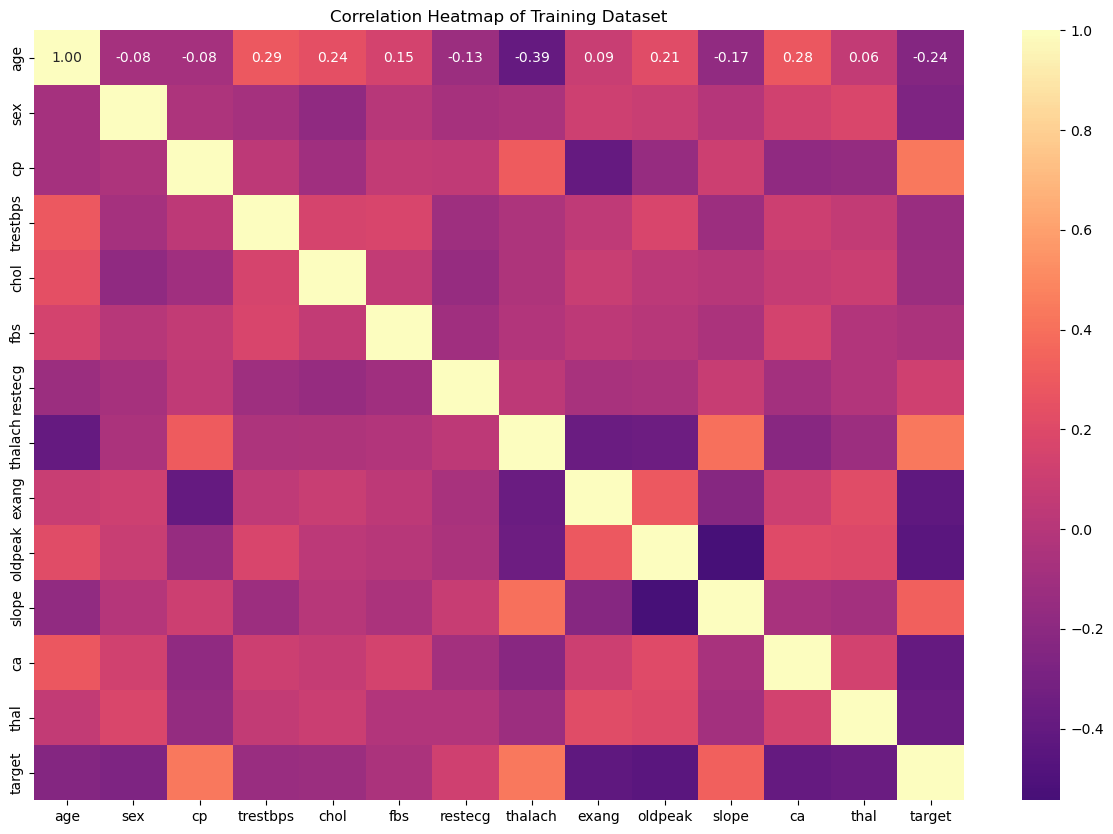

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.corr(), annot=True, fmt=".2f", cmap='magma', center=0)
plt.title('Correlation Heatmap of Training Dataset')
plt.show()

/home/sharon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


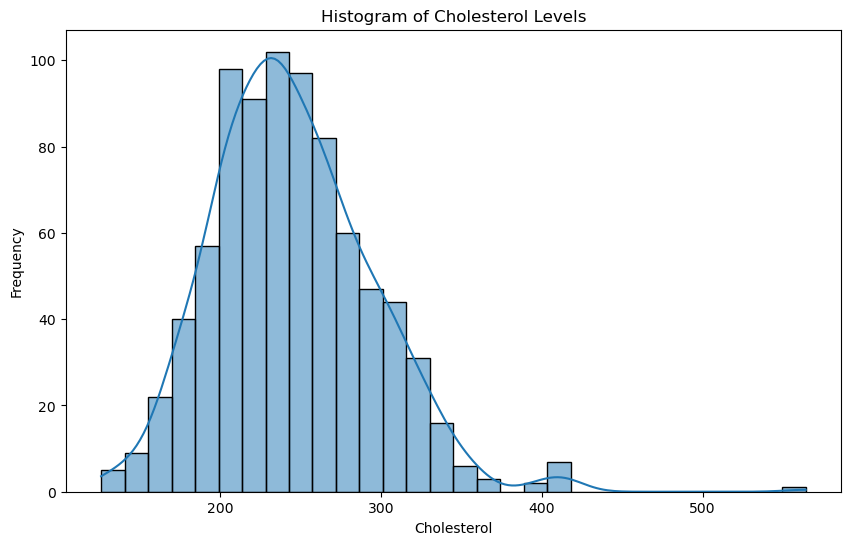

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='chol', kde=True, bins=30)
plt.title('Histogram of Cholesterol Levels')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

/home/sharon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


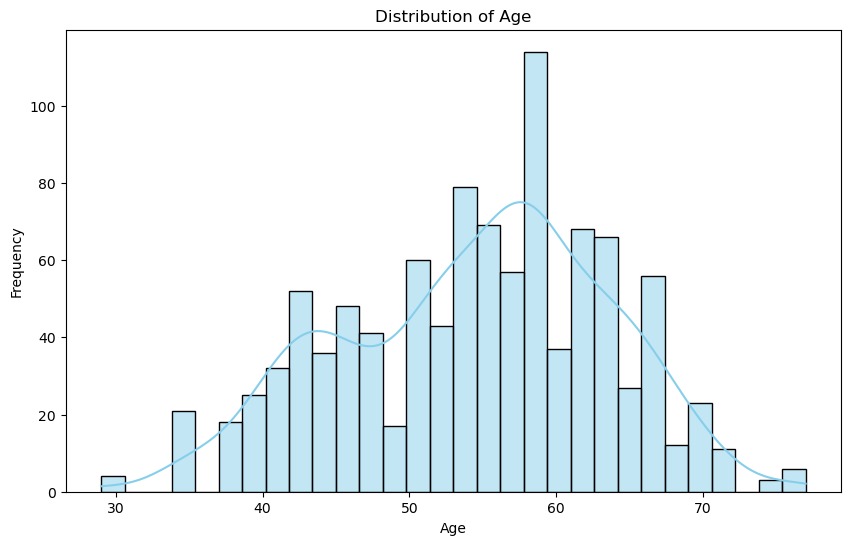

In [8]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

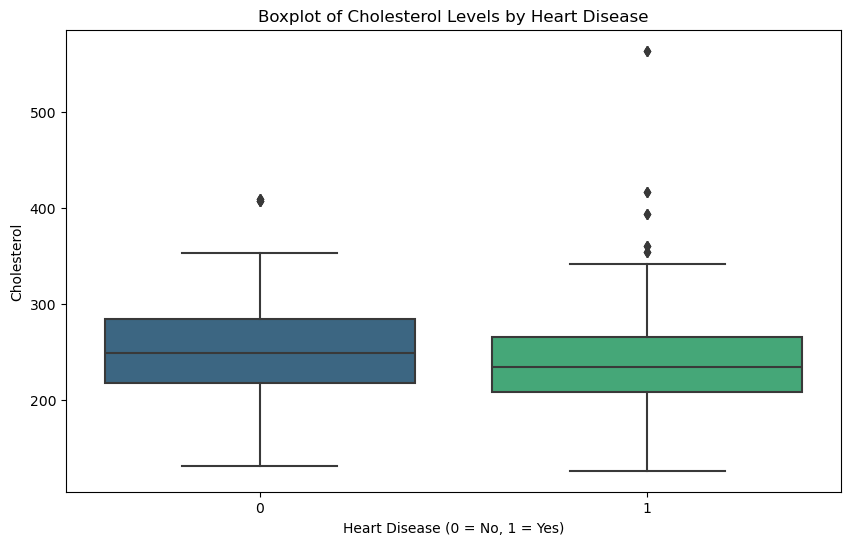

In [9]:
# Boxplot for Cholesterol by Target
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='chol', palette='viridis')
plt.title('Boxplot of Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol')
plt.show()

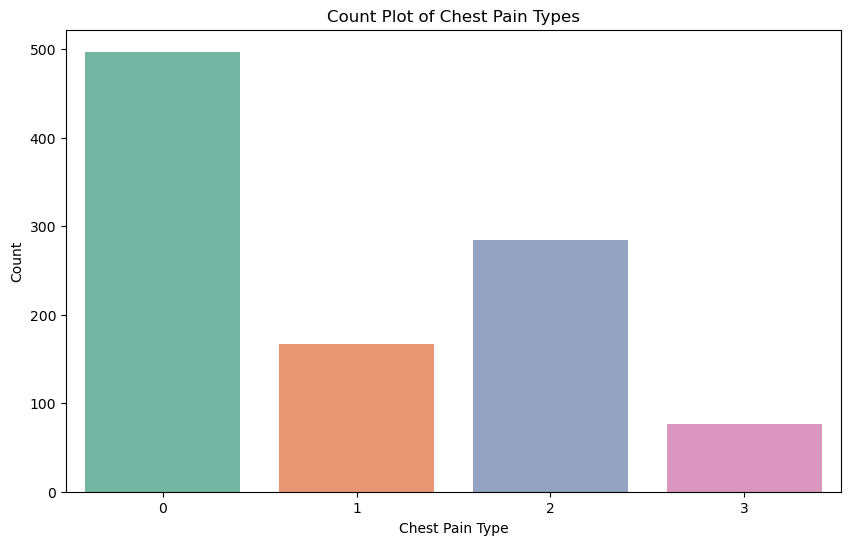

In [10]:
# Count Plot for Chest Pain Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', palette='Set2')
plt.title('Count Plot of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

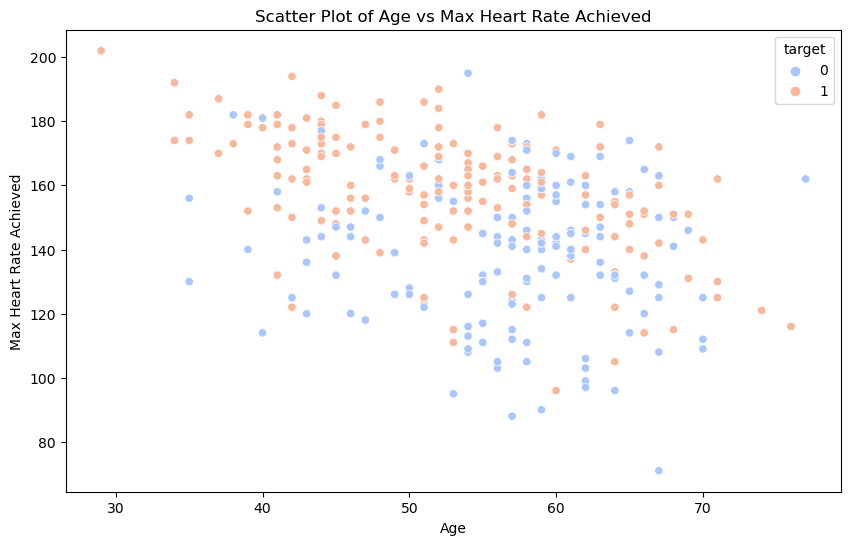

In [11]:
# Scatter Plot for Age vs Max Heart Rate Achieved
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='coolwarm')
plt.title('Scatter Plot of Age vs Max Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.show()

/home/sharon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sharon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sharon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sharon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

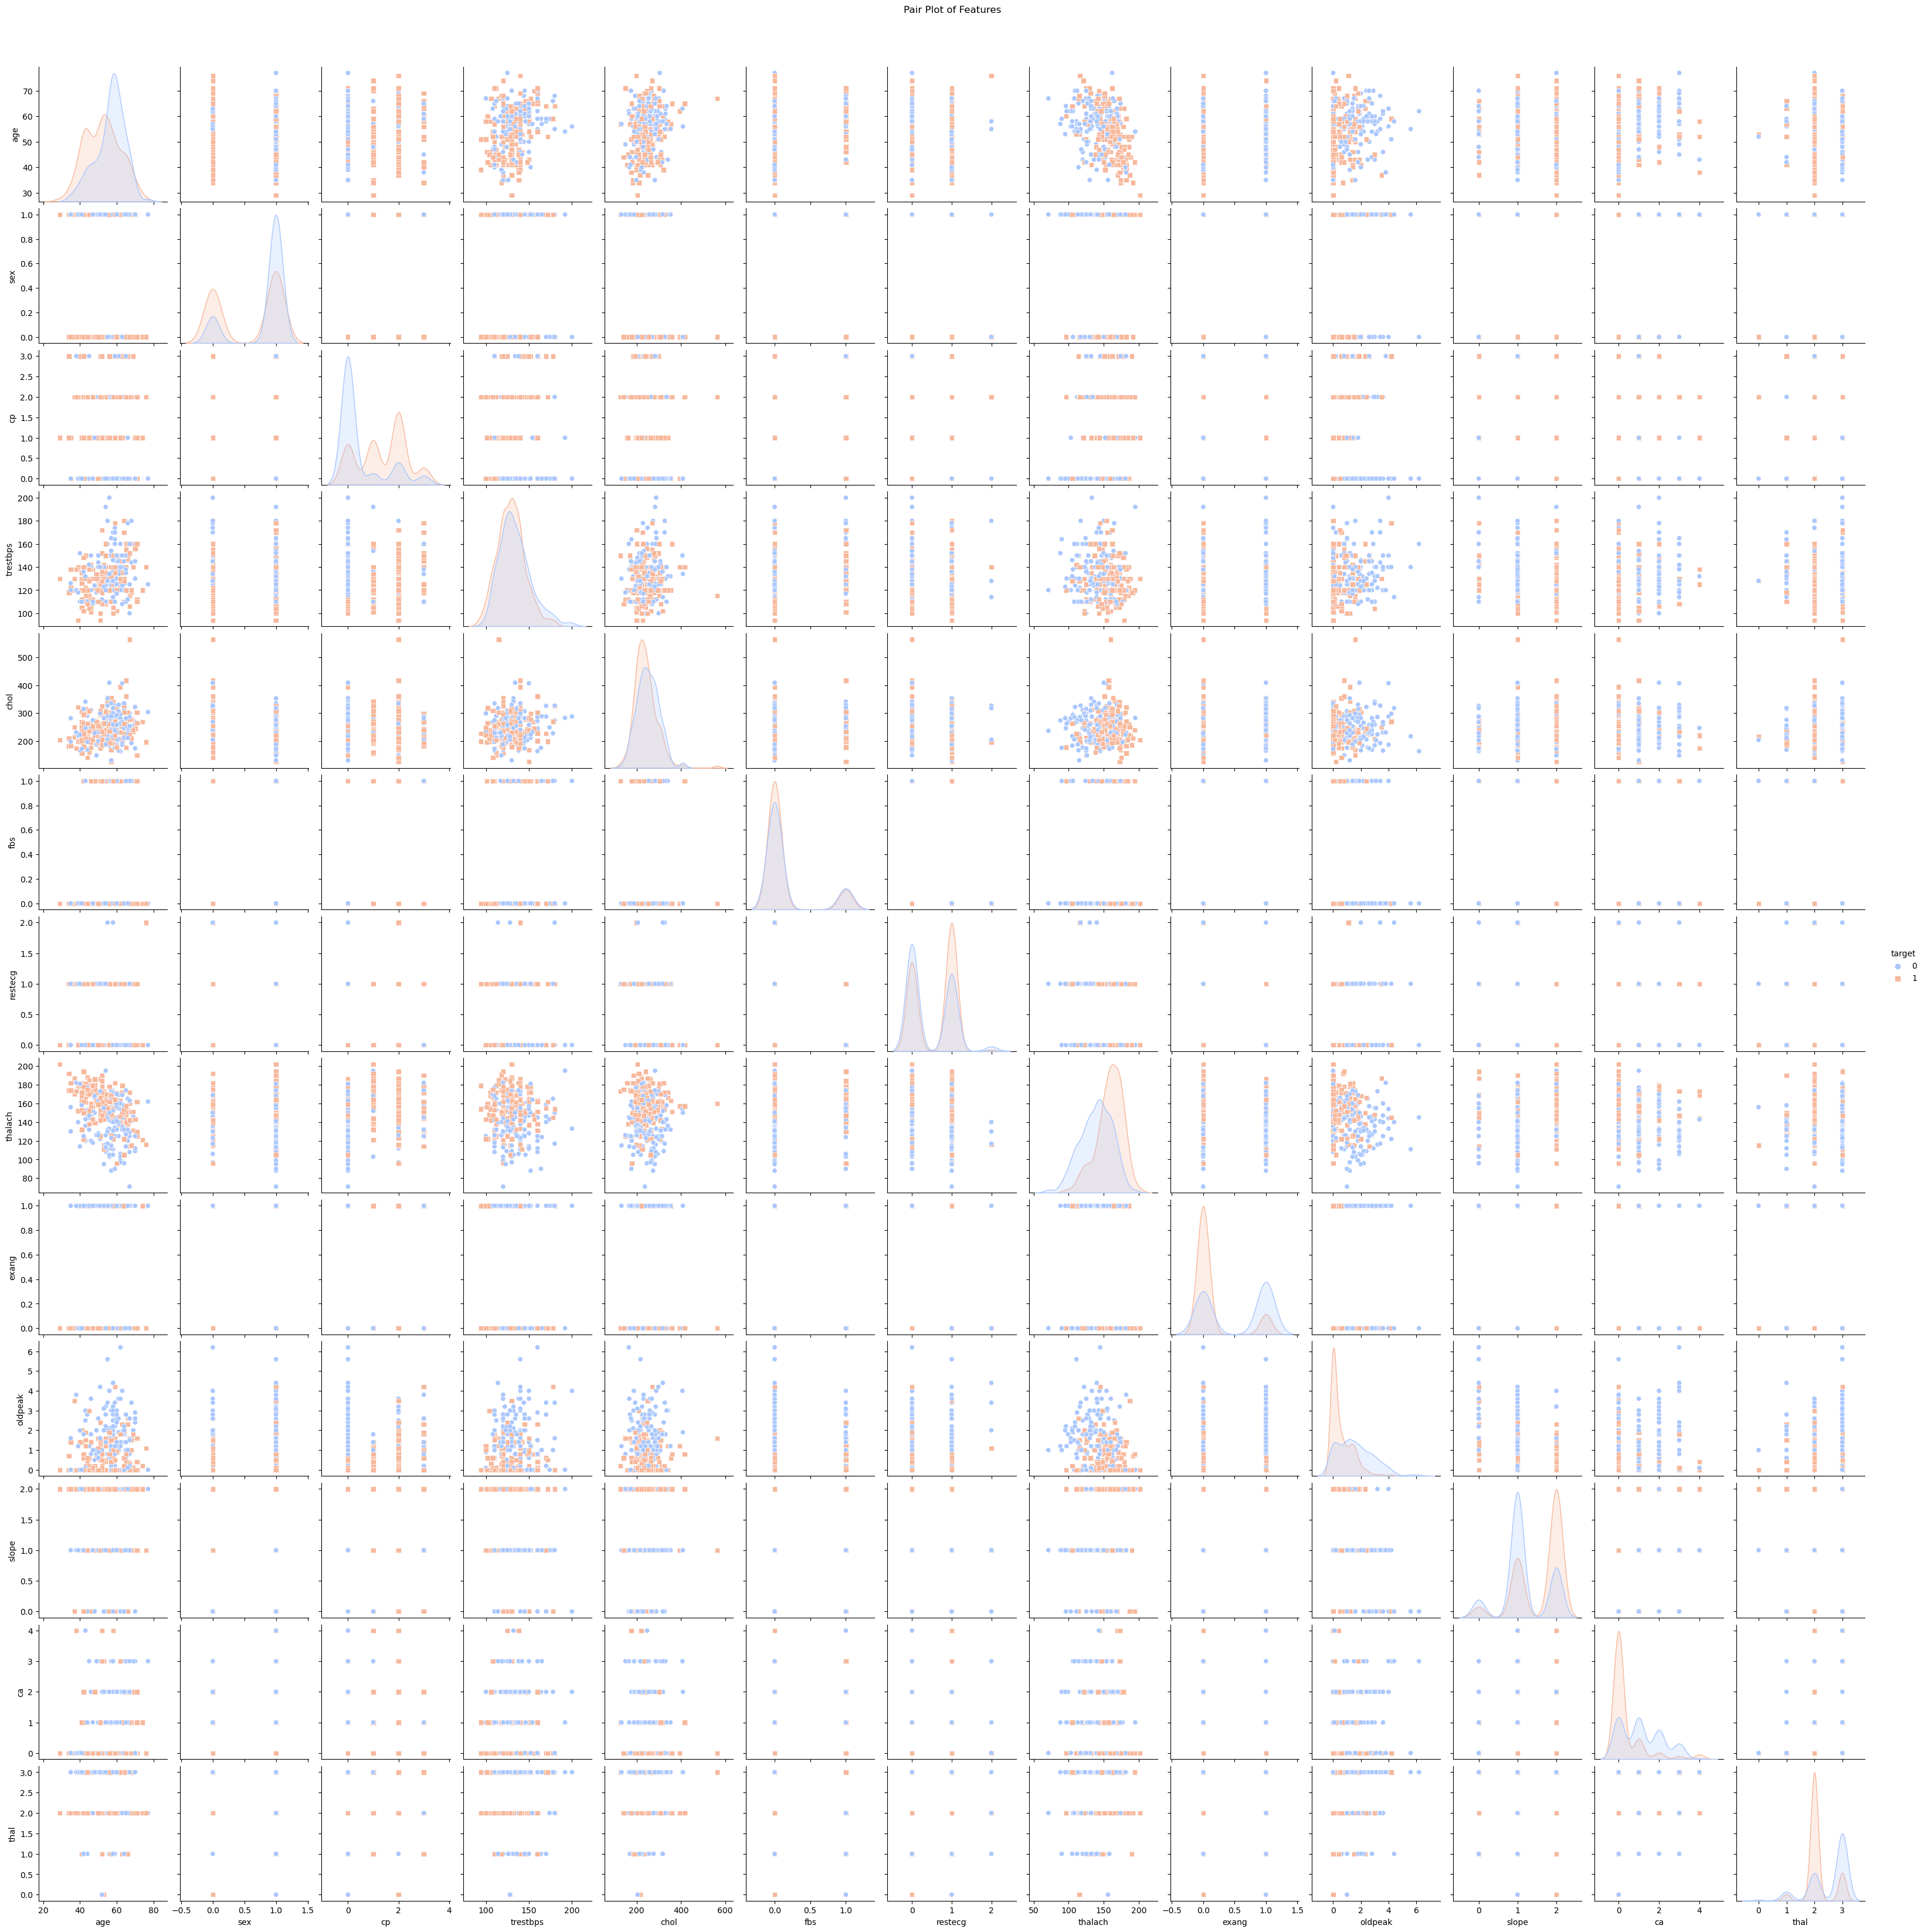

In [12]:
# Pair Plot
sns.pairplot(df, hue='target', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

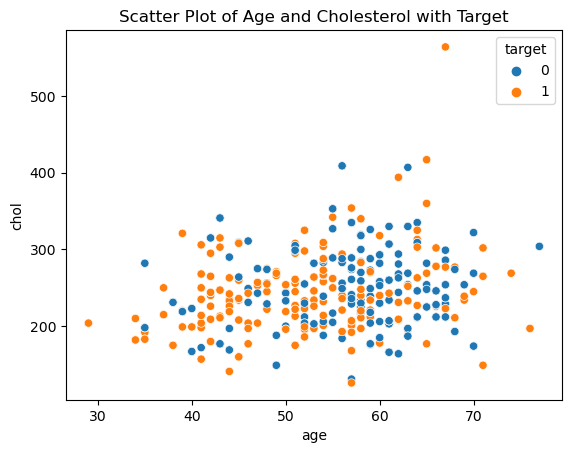

In [13]:
sns.scatterplot(data=train_df, x='age', y='chol', hue='target')
plt.title('Scatter Plot of Age and Cholesterol with Target')
plt.show()o

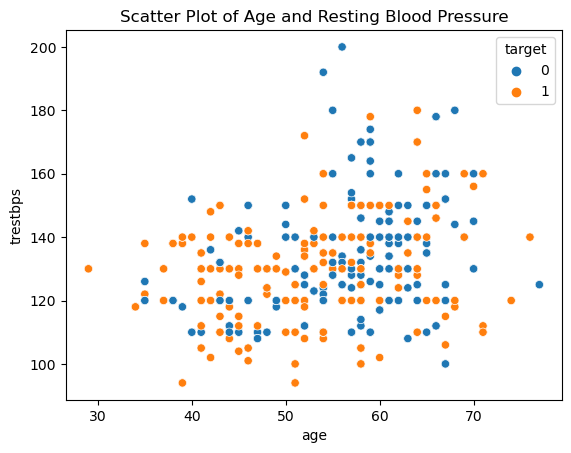

In [14]:
sns.scatterplot(data=train_df, x='age', y='trestbps', hue='target')
plt.title('Scatter Plot of Age and Resting Blood Pressure')
plt.show()

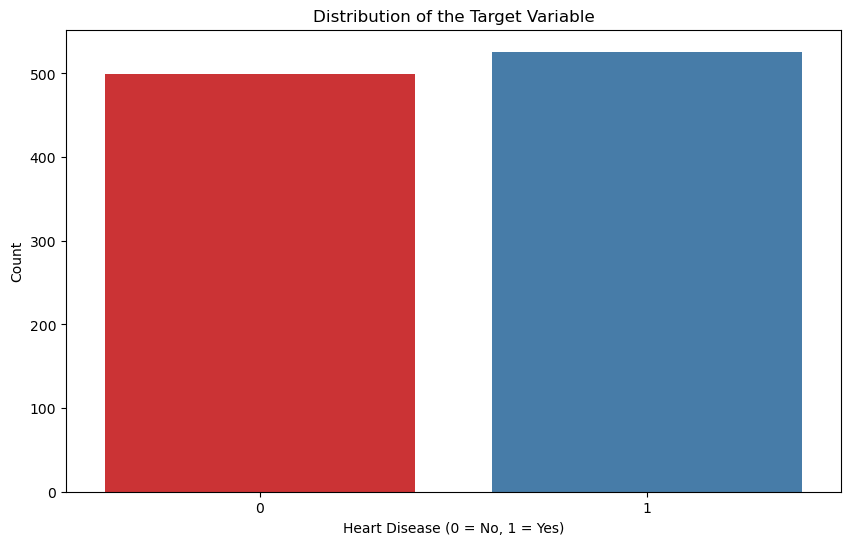

In [15]:
# Distribution of the Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='target', palette='Set1')
plt.title('Distribution of the Target Variable')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## Importing Necessary Models

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [17]:
# Removing target column from data

a_train = train_df.drop(['target'], axis=1)
b_train = train_df['target']

a_test = test_df.drop(['target'], axis=1)
b_test = test_df['target']

## Training Models

In [18]:
model_lr = LogisticRegression(max_iter = 1500)
model_lr.fit(a_train, b_train)

LogisticRegression(max_iter=1500)

In [19]:
model_rf = RandomForestClassifier()
model_rf.fit(a_train, b_train)

RandomForestClassifier()

In [20]:
b_pred = model_lr.predict(a_test)

In [21]:
Brf_pred = model_rf.predict(a_test)

## Compare the Models

In [22]:
print("LOGISTIC REGRESSSION")
print(classification_report(y_pred=b_pred, y_true=b_test))
print("RANDOM FOREST CLASSIFIER")
print(classification_report(y_pred=Brf_pred, y_true=b_test))

LOGISTIC REGRESSSION
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

RANDOM FOREST CLASSIFIER
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [23]:
print(accuracy_score(y_pred=b_pred, y_true=b_test))

print(accuracy_score(y_pred= Brf_pred, y_true=b_test))

0.7951219512195122
0.9853658536585366


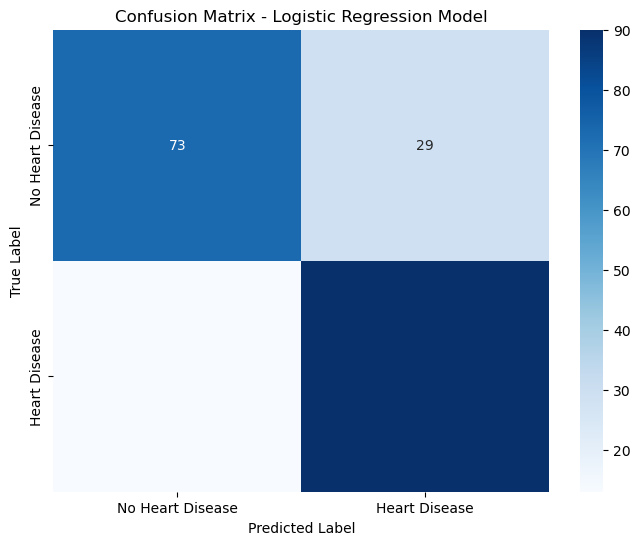

In [24]:
# Confusion matrix for Logistic Regression

conf_matrix_lr = confusion_matrix(b_test, b_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

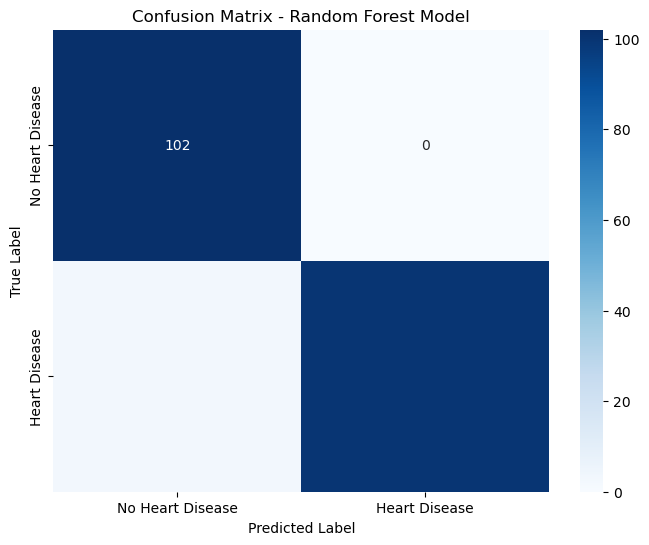

In [25]:
# Confusion matrix for random forest

conf_matrix_rf = confusion_matrix(b_test, Brf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

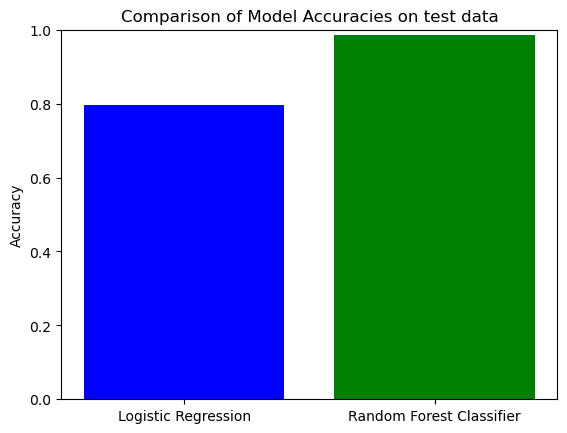

In [26]:
# Predictions from Logistic Regression model
b_pred_lr = model_lr.predict(a_test)
accuracy_lr = accuracy_score(b_test, b_pred_lr)


# Predictions from Random Forest Classifier model
b_pred_rf = model_rf.predict(a_test)
accuracy_rf = accuracy_score(b_test, b_pred_rf)

# Bar graph
labels = ['Logistic Regression', 'Random Forest Classifier']
accuracies = [accuracy_lr, accuracy_rf]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies on test data')
plt.ylim(0, 1) 
plt.show()

## Saving the Random Forest Model as a PKL File

In [26]:
with open('heart_disease.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

## Testing the Model with User Inputs

In [27]:
age = int(input("enter age: "))
sex = int(input("enter sex(0 female 1 male): "))
cp = int(input("enter cp (0-3):"))
trestbps = int(input("enter trestbps: "))
chol = int(input("enter chol: "))
fbs = int(input("enter fbs: "))
restecg = int(input("enter restecg: "))
thalach = int(input("enter thalach: "))
exang = int(input("enter exang: "))
oldpeak = float(input("enter oldpeak: "))
slope = int(input("enter slope: "))
ca = int(input("enter ca(0-3): "))
thal = int(input("enter thal: "))

user_input = {
        'age': [age],
        'sex': [sex],
        'cp': [cp],
        'trestbps': [trestbps],
        'chol': [chol],
        'fbs': [fbs],
        'restecg': [restecg],
        'thalach': [thalach],
        'exang': [exang],
        'oldpeak': [oldpeak],
        'slope': [slope],
        'ca': [ca],
        'thal': [thal]
    }
user_DF = pd.DataFrame(user_input)

enter age:  53
enter sex(0 female 1 male):  0
enter cp (0-3): 1
enter trestbps:  1
enter chol:  1
enter fbs:  1
enter restecg:  1
enter thalach:  1
enter exang:  1
enter oldpeak:  1
enter slope:  1
enter ca(0-3):  1
enter thal:  1


In [28]:
def heart_prediction(user_DF):
    pred_user = model_rf.predict(user_DF)
    if pred_user == 0:
        return "No heart disease\nYou're healthy"
    elif pred_user == 1:
        return "Heart disease\nTake precautions"
    
result = heart_prediction(user_DF)
print(result)

No heart disease
You're healthy
